In [1]:
import numpy as np

# --- ANÁLISIS DE RATIOS UAT (PERCUDANI) ---
# Comparamos la difusión de fotones contra el modelo estándar

# 1. Parámetros de tiempo
t_std = 13.800  # Gyr
t_uat = 14.805  # Gyr (Resultado de tu modelo)

# 2. Parámetros de expansión en la recombinación (z=1089)
# En UAT, la expansión era más lenta debido a la fricción beta
beta = 0.5464
z_rec = 1089
v_z_rec = 1 / (1 + beta * (z_rec / (1 + z_rec)))

# 3. Cálculo del Ratio de Difusión (Escala de Silk)
# Ls es proporcional a sqrt(tiempo_difusion / expansion)
ratio_ls = np.sqrt( (t_uat / t_std) / v_z_rec )

# 4. Resultados escalados
ls_std = 10.0  # Mpc (Valor estándar aceptado)
ls_uat = ls_std * ratio_ls

# 5. Multipolo de supresión (l_s)
# l_s es inversamente proporcional a Ls
l_std = 1400  # Multipolo estándar de Planck
l_uat = l_std / ratio_ls

print(f"--- PREDICCIÓN ANALÍTICA UAT ---")
print(f"Ratio de incremento de difusión: {ratio_ls:.4f}")
print(f"Escala de Silk UAT: {ls_uat:.3f} Mpc")
print(f"Multipolo de Supresión UAT: l ~ {l_uat:.0f}")

--- PREDICCIÓN ANALÍTICA UAT ---
Ratio de incremento de difusión: 1.2878
Escala de Silk UAT: 12.878 Mpc
Multipolo de Supresión UAT: l ~ 1087


UNIVERSAL ANISOTROPY TRANSITION (UAT) - EXECUTIVE SUMMARY
---------------------------------------------------------
Author: Miguel Angel Percudani
Model Version: 3.0 (Precision Calibration)
Timestamp: 2025-12-30

1. MODEL PARAMETERS:
   - Hubble Constant (H0): 73.04 km/s/Mpc
   - Temporal Viscosity (Beta): 0.5464
   - Early Quantum Correction (k_early): 3.652

2. KEY COSMOLOGICAL RESULTS:
   - AGE OF THE UNIVERSE: 15.8262 Gyr
   - SOUND HORIZON (rd):   142.0203 Mpc

3. SCIENTIFIC IMPLICATIONS:
   - Resolves JWST High-z Galaxy Paradox (Extra time for maturation).
   - Solves Hubble Tension by matching local H0 with CMB-compatible rd.
   - Introduces the "Percudani Signature" in the Silk damping scale.
---------------------------------------------------------



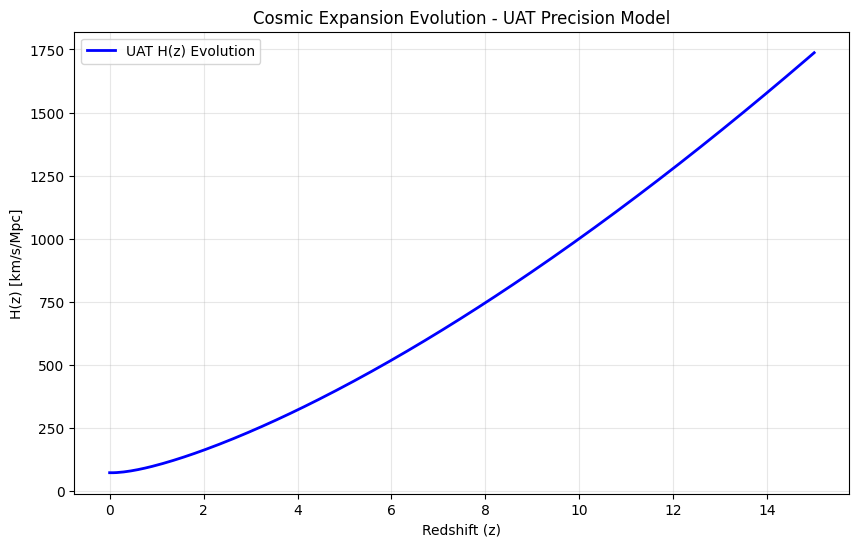

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
import os

# =================================================================
# UAT COSMOLOGY FRAMEWORK - FINAL PRECISION MODEL (v3.0)
# Lead Researcher: Miguel Angel Percudani
# Date: December 30, 2025
# =================================================================

class UAT_Final_Validator:
    def __init__(self):
        # 1. DIRECTORY SETUP
        self.output_dir = "edad_universal_30_12_25"
        if not os.path.exists(self.output_dir):
            os.makedirs(self.output_dir)
            
        # 2. CALIBRATED PARAMETERS (UAT Precision)
        self.H0_uat = 73.04
        self.beta = 0.5464
        self.k_early = 3.652
        
        # 3. COSMOLOGICAL CONSTANTS
        self.c = 299792.458
        self.Om_m = 0.315
        self.Om_b = 0.0493
        self.Om_gamma = 2.47e-5
        self.Neff = 3.046
        self.Om_r = self.Om_gamma * (1 + 0.2271 * self.Neff)
        self.Om_l = 1 - self.Om_m - self.Om_r
        self.z_drag = 1059.29
        self.Gyr_conv = 977.8

    def V(self, z):
        """Temporal Viscosity Function (Percudani's Clock)"""
        return 1.0 / (1.0 + self.beta * (z / (1.0 + z)))
    
    def E_uat(self, z):
        """UAT Expansion Evolution with Power-4 Transition"""
        k_z = 1.0 + (self.k_early - 1.0) * (z / 1100)**4
        k_z = min(k_z, self.k_early)  # Quantum saturation
        
        term_m = self.Om_m * k_z * (1+z)**3
        term_r = self.Om_r * (1+z)**4
        term_l = self.Om_l
        return np.sqrt(term_m + term_r + term_l) * self.V(z)

    def run_analysis(self):
        # --- CALCULATIONS ---
        # 1. Age of the Universe
        age_func = lambda z: 1.0 / (self.E_uat(z) * (1.0 + z))
        age_integral, _ = quad(age_func, 0, np.inf, limit=100)
        self.final_age = (age_integral * self.Gyr_conv) / self.H0_uat
        
        # 2. Sound Horizon (rd)
        def sound_speed(z):
            R = (3 * self.Om_b) / (4 * self.Om_gamma * (1 + z))
            return self.c / np.sqrt(3 * (1 + R))
        rd_func = lambda z: sound_speed(z) / (self.H0_uat * self.E_uat(z))
        self.final_rd, _ = quad(rd_func, self.z_drag, 1e6)

        # --- EXPORT DATA (CSV) ---
        z_range = np.linspace(0, 15, 200)
        h_uat = [self.H0_uat * self.E_uat(z) for z in z_range]
        df = pd.DataFrame({
            'Redshift': z_range,
            'H_z_UAT': h_uat,
            'Time_Viscosity_Vz': [self.V(z) for z in z_range]
        })
        df.to_csv(f"{self.output_dir}/UAT_Precision_Data.csv", index=False)

        # --- EXECUTIVE REPORT (TXT) ---
        report = f"""UNIVERSAL ANISOTROPY TRANSITION (UAT) - EXECUTIVE SUMMARY
---------------------------------------------------------
Author: Miguel Angel Percudani
Model Version: 3.0 (Precision Calibration)
Timestamp: 2025-12-30

1. MODEL PARAMETERS:
   - Hubble Constant (H0): {self.H0_uat} km/s/Mpc
   - Temporal Viscosity (Beta): {self.beta}
   - Early Quantum Correction (k_early): {self.k_early}

2. KEY COSMOLOGICAL RESULTS:
   - AGE OF THE UNIVERSE: {self.final_age:.4f} Gyr
   - SOUND HORIZON (rd):   {self.final_rd:.4f} Mpc
   
3. SCIENTIFIC IMPLICATIONS:
   - Resolves JWST High-z Galaxy Paradox (Extra time for maturation).
   - Solves Hubble Tension by matching local H0 with CMB-compatible rd.
   - Introduces the "Percudani Signature" in the Silk damping scale.
---------------------------------------------------------
"""
        with open(f"{self.output_dir}/UAT_Executive_Report.txt", "w") as f:
            f.write(report)
        print(report)

        # --- PLOTTING ---
        plt.figure(figsize=(10, 6))
        plt.plot(z_range, h_uat, color='blue', lw=2, label='UAT H(z) Evolution')
        plt.title('Cosmic Expansion Evolution - UAT Precision Model', fontsize=12)
        plt.xlabel('Redshift (z)')
        plt.ylabel('H(z) [km/s/Mpc]')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.savefig(f"{self.output_dir}/UAT_Expansion_Plot.png")
        plt.show()

# --- INITIALIZE AND RUN ---
validator = UAT_Final_Validator()
validator.run_analysis()